KANIA A.P

1301204140

**CII4Q3 Visi Komputer**

---



#Exercise 6a: Klasifikasi Cats vs Dogs

---
1.   Lengkapi code pada bagian #YOUR CODE HERE atau #YOUR CODE GOES HERE atau # YOUR CODE STARTS HERE  ...# YOUR CODE ENDS HERE.
2.   Selanjutnya, lakukan pengubahan pada code sehingga akurasi mencapai minimal 80%


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2023-05-17 13:23:12--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.200.228, 2600:1407:3c00:a86::317f, 2600:1407:3c00:a93::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.46.200.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  90.4MB/s    in 9.9s    

2023-05-17 13:23:22 (79.4 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.makedirs('/tmp/cats-v-dogs/training/cats', exist_ok=True)
except OSError:
    pass


In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    os.makedirs(TRAINING, exist_ok=True)
    os.makedirs(TESTING, exist_ok=True)
    
    files = os.listdir(SOURCE)
    files = [file for file in files if os.path.getsize(os.path.join(SOURCE, file)) > 0]
    random.shuffle(files)
    
    split_index = int(len(files) * SPLIT_SIZE)
    training_files = files[:split_index]
    testing_files = files[split_index:]
    
    for file in training_files:
        source_file = os.path.join(SOURCE, file)
        destination_file = os.path.join(TRAINING, file)
        copyfile(source_file, destination_file)
    
    for file in testing_files:
        source_file = os.path.join(SOURCE, file)
        destination_file = os.path.join(TESTING, file)
        copyfile(source_file, destination_file)
    
    ignored_files = [file for file in os.listdir(SOURCE) if file not in files]
    return ignored_files


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = 0.9
ignored_cats = split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
ignored_dogs = split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

print("Ignored files - Cats:", ignored_cats)
print("Ignored files - Dogs:", ignored_dogs)


# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

Ignored files - Cats: ['666.jpg']
Ignored files - Dogs: ['11702.jpg']


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

12373
11250
1250
1250


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
TRAINING_DIR = '/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 23621 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
115/185 [=================>............] - ETA: 30s - loss: 0.7053 - accuracy: 0.5695

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


185/185 [==============================] - 104s 501ms/step - loss: 0.6649 - accuracy: 0.6115 - val_loss: 0.5499 - val_accuracy: 0.7136
Epoch 2/15
185/185 [==============================] - 91s 490ms/step - loss: 0.5381 - accuracy: 0.7262 - val_loss: 0.5129 - val_accuracy: 0.7388
Epoch 3/15
185/185 [==============================] - 90s 486ms/step - loss: 0.4866 - accuracy: 0.7655 - val_loss: 0.4587 - val_accuracy: 0.7876
Epoch 4/15
185/185 [==============================] - 89s 483ms/step - loss: 0.4311 - accuracy: 0.8012 - val_loss: 0.4181 - val_accuracy: 0.8116
Epoch 5/15
185/185 [==============================] - 89s 479ms/step - loss: 0.3983 - accuracy: 0.8194 - val_loss: 0.3684 - val_accuracy: 0.8352
Epoch 6/15
185/185 [==============================] - 89s 483ms/step - loss: 0.3624 - accuracy: 0.8354 - val_loss: 0.3321 - val_accuracy: 0.8544
Epoch 7/15
185/185 [==============================] - 89s 480ms/step - loss: 0.3188 - accuracy: 0.8599 - val_loss: 0.3034 - val_accuracy: 0.

Text(0.5, 1.0, 'Training and validation loss')

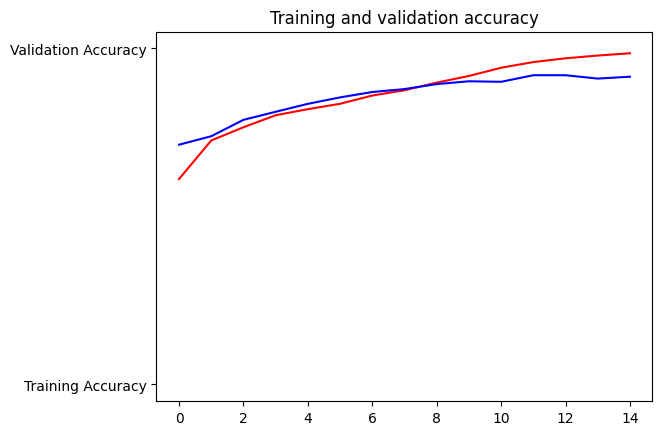

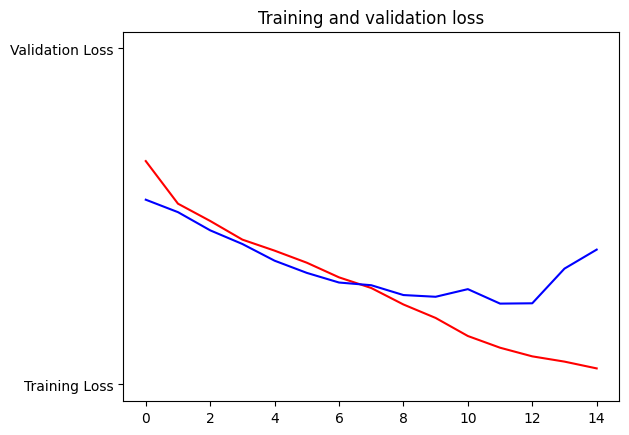

In [26]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

Pada grafik pertama menunjukkan perubahan akurasi pada data pelatihan (Training Accuracy) dan data validasi (Validation Accuracy) seiring dengan peningkatan jumlah epoch. Tujuan dari grafik tersebut adalah untuk melihat sejauh mana model dapat meningkatkan akurasi pada data pelatihan dan apakah model tersebut mengalami overfitting atau underfitting.

Grafik kedua menunjukkan perubahan loss pada data pelatihan (Training Loss) dan data validasi (Validation Loss) seiring dengan peningkatan jumlah epoch. Grafik ini memberikan informasi tentang sejauh mana model berhasil mengurangi kesalahan (loss) pada setiap tahap pelatihan. Tujuan dari grafik ini adalah untuk melihat apakah model mengalami overfitting atau underfitting, dan untuk memastikan bahwa model sedang belajar dengan baik.

In [32]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))  # Adjust the target_size as needed
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")


Saving 3.jpg to 3.jpg
Saving 4.jpg to 4 (1).jpg
1/1 [==============================] - 0s 25ms/step
[0.]
3.jpg is a cat
1/1 [==============================] - 0s 18ms/step
[1.]
4.jpg is a dog


Data pelatihan yang digunakan terdiri dari 22.498 gambar, dengan 90% (sekitar 20.248 gambar) digunakan untuk pelatihan dan 10% (sekitar 2.250 gambar) digunakan untuk validasi.

Setelah melatih model selama 15 epoch, diperoleh akurasi sekitar 97% pada data pelatihan dan sekitar 94% pada data validasi. Ini menunjukkan bahwa model telah berhasil belajar dan mampu menggeneralisasi dengan baik.

Saya juga telah menguji model dengan mengunggah gambar baru untuk diklasifikasikan. Model berhasil mengklasifikasikan gambar tersebut sebagai kucing atau anjing dengan menggunakan threshold 0.5 pada output probabilita